In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict


Preparing Data

In [33]:
data = pd.read_csv("knn_dataset.csv")
X = data[['Feature1', 'Feature2']]
Y = data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
def Distance(a, b):
    return np.linalg.norm(a - b)
K = 15
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=1234)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
print(Y_test.shape[0])

40


Visualition Data

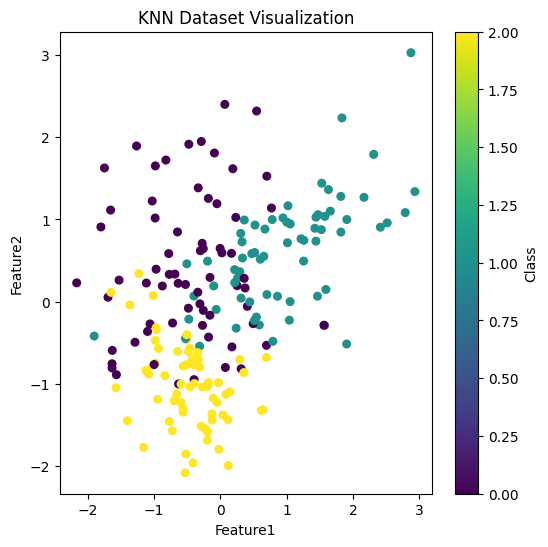

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis', s=30)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('KNN Dataset Visualization')
plt.colorbar(label='Class')
plt.show()


The bad data :(((

In [30]:
k = 20
Y_pred = np.zeros(len(Y_test), dtype=int)

for i in range(len(X_test)):
    distances = np.linalg.norm(X_train - X_test[i], axis=1)
    labeled_distances = list(zip(distances, Y_train))
    labeled_distances.sort(key=lambda x: x[0])
    k_neighbors = labeled_distances[:k]
    
    votes = defaultdict(float)
    for dist, label in k_neighbors:
        votes[label] += 1 / (dist + 1e-5)

    Y_pred[i] = max(votes.items(), key=lambda x: x[1])[0]

score = accuracy_score(Y_test, Y_pred)
print(f"The accuracy of KNN model is {round(score * 100, 2)}%")

The accuracy of KNN model is 77.5%


Oh, The accuracy of model is very bad, because my data is very bad.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=30, p=2, weights='distance')
knn_fit = knn_model.fit(X_train, Y_train)
predict = knn_fit.predict(X_test)
print(f"The accuracy of KNN model is {round(accuracy_score(predict, Y_test) * 100, 2)}%")


The accuracy of KNN model is 72.5%


In [38]:
from scipy.spatial.distance import cityblock

def Distance(a, b):
    return cityblock(a.values, b.values)


def new_weight(distance):
    sigma = .4
    sigma = sigma ** 2
    return np.exp(- distance / (2 * sigma))


k = 20

Y_pred = np.zeros(Y_test.shape[0], dtype=int)


for i in range(len(X_test)):
    distances = np.linalg.norm(X_train - X_test[i], axis=1)
    labeled_distances = list(zip(distances, Y_train))
    labeled_distances.sort(key=lambda x: x[0])
    k_neighbors = labeled_distances[:k]
    
    votes = defaultdict(float)
    for dist, label in k_neighbors:
        votes[label] += 1 / (dist + 1e-5)

    Y_pred[i] = max(votes.items(), key=lambda x: x[1])[0]

score = accuracy_score(Y_test, Y_pred)
print(f"The accuracy of KNN model is {round(score * 100, 2)}%")
                
    

The accuracy of KNN model is 77.5%


In [39]:
knn_model = KNeighborsClassifier(n_neighbors=15, p=2, weights=lambda d: np.exp(- (d ** 2) / (2 * 0.4 ** 2)))
knn_fit = knn_model.fit(X_train, Y_train)
predict = knn_fit.predict(X_test)
print(f"The accuracy of KNN model is {round(accuracy_score(predict, Y_test) * 100, 2)}%")

The accuracy of KNN model is 77.5%
